In [1]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
import sklearn
%matplotlib inline

def get_obj(file_name):
    return pickle.load(open(os.path.join("./myres", file_name), 'rb'))

mc = get_obj('mnist-cnn.test.res')
ac = get_obj('mnist_with_awgn-cnn.test.res')
bc = get_obj('mnist_with_motion_blur-cnn.test.res')
cc = get_obj('mnist_with_reduced_contrast_and_awgn-cnn.test.res')
mr = get_obj('mnist-raw.test.res')
ar = get_obj('mnist_with_awgn-raw.test.res')
br = get_obj('mnist_with_motion_blur-raw.test.res')
cr = get_obj('mnist_with_reduced_contrast_and_awgn-raw.test.res')
m128 = get_obj('mnist-dropout_2.test.res')
a128 = get_obj('mnist_with_awgn-dropout_2.test.res')
b128 = get_obj('mnist_with_motion_blur-dropout_2.test.res')
c128 = get_obj('mnist_with_reduced_contrast_and_awgn-dropout_2.test.res')
m10 = get_obj('mnist-dense_2.test.res')
a10 = get_obj('mnist_with_awgn-dense_2.test.res')
b10 = get_obj('mnist_with_motion_blur-dense_2.test.res')
c10 = get_obj('mnist_with_reduced_contrast_and_awgn-dense_2.test.res')
m9216 = get_obj('mnist-flatten_1.test.res')
a9216 = get_obj('mnist_with_awgn-flatten_1.test.res')
b9216 = get_obj('mnist_with_motion_blur-flatten_1.test.res')
c9216 = get_obj('mnist_with_reduced_contrast_and_awgn-flatten_1.test.res')

## accuracy

In [2]:
print(mc["accuracy"], ac["accuracy"], bc["accuracy"], cc["accuracy"])

0.992 0.9444 0.9543 0.7267


In [3]:
print(mr["accuracy"], ar["accuracy"], br["accuracy"], cr["accuracy"])

0.9778 0.7689 0.9585 0.5659


In [4]:
print(m128["accuracy"], a128["accuracy"], b128["accuracy"], c128["accuracy"])

0.9919 0.9552 0.9499 0.8081


In [5]:
print(m10["accuracy"], a10["accuracy"], b10["accuracy"], c10["accuracy"])

0.9927 0.9446 0.9661 0.625


In [6]:
print(m9216["accuracy"], a9216["accuracy"], b9216["accuracy"], c9216["accuracy"])

0.9906 0.9525 0.8878 0.8119


## Plot cnn < 30%

9
0
9
0
3


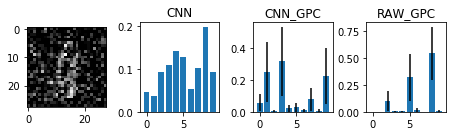

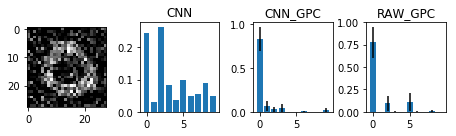

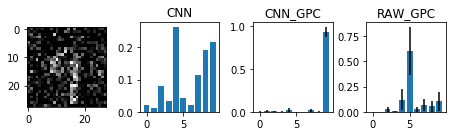

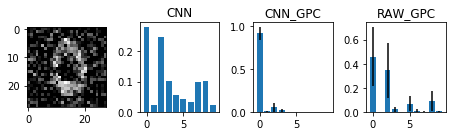

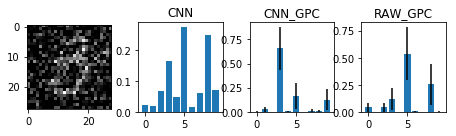

In [7]:
idxs = np.where(np.max(cc["prob"], axis = 1) < 0.3)[0]
#fig=plt.figure(dpi= 60)
#plt.imshow(cc["Xt"][idx].reshape(28,28), cmap="binary_r")
#plt.colorbar()
#print(cc["Yt"][idx])

def gen_img(idxs, LEN, filename="img"):
    for i in range(LEN):
        idx = idxs[i]
        fig = plt.figure(figsize=(6.5,2))
        plt.subplot(1, 4, 1)
        plt.imshow(cc["Xt"][idx].reshape(28,28), cmap="binary_r")
        plt.subplot(1, 4, 2)
        plt.bar(x=range(10), height=cc["prob"][idx], yerr=cc["var"][idx])
        plt.gca().set_title('CNN')
        plt.subplot(1, 4, 3)
        plt.bar(x=range(10), height=c128["prob"][idx], yerr=c128["var"][idx])
        plt.gca().set_title('CNN_GPC')
        plt.subplot(1, 4, 4)
        plt.tight_layout(w_pad=0.1)
        plt.bar(x=range(10), height=cr["prob"][idx], yerr=cr["var"][idx])
        plt.gca().set_title('RAW_GPC')
        fig.savefig(os.path.join('./plots/', filename + str(i) + '.pdf'), format="pdf", dpi=600)
        print(cc["Yt"][idx])

gen_img(idxs, 5, "cnn30")

[  82  140  446  449  655  707  738 1038 1097 1229 1255 1297 1521 2630
 2636 2841 3149 3181 3641 4006 4395 4953 4970 5346 5867 6003 6270 6451
 6762 6800 6860 6905 6974 7371 7616 7683 7848 7860 7960 8044 8186 8860
 9174 9219 9220 9425 9633 9676 9727 9759 9828]
6
6
7
4
0


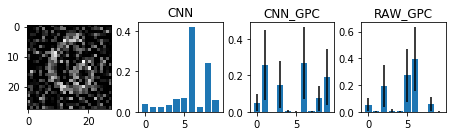

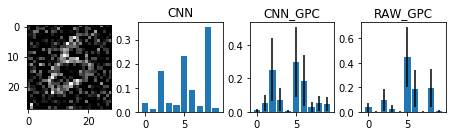

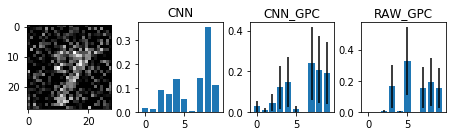

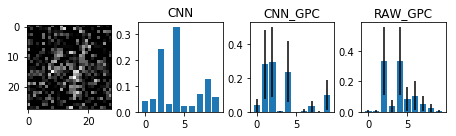

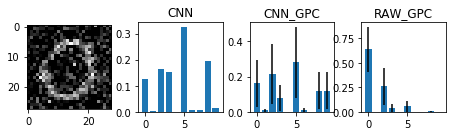

In [8]:
idxs = np.where(np.logical_and((np.max(c128["prob"], axis = 1) < 0.3) , (np.max(cc["prob"], axis = 1) > 0.3)))[0]
print(idxs)
gen_img(idxs, 5, "sp")

## CM

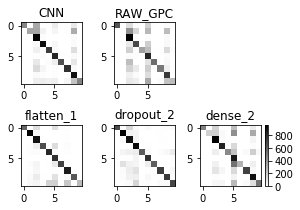

In [9]:
def confusion_matrix_gen(pred, y):
    cm = np.zeros((10, 10), dtype = "int64")
    for idx in range(len(y)):
        cm[y[idx]][pred[idx]] += 1
    return cm

np.argmax(cc["prob"], axis=1).shape
cc["Yt"].shape

cc_cm = confusion_matrix_gen(np.argmax(cc["prob"], axis=1), cc["Yt"])
c128_cm = confusion_matrix_gen(np.argmax(c128["prob"], axis=1), c128["Yt"])
c10_cm = confusion_matrix_gen(np.argmax(c10["prob"], axis=1), c10["Yt"])
c9216_cm = confusion_matrix_gen(np.argmax(c9216["prob"], axis=1), c9216["Yt"])
cr_cm = confusion_matrix_gen(np.argmax(cr["prob"], axis=1), cr["Yt"])
#print(cc_cm)

fig = plt.figure(figsize=(4.4,3))
plt.subplot(2, 3, 1)
plt.imshow(cc_cm, cmap="binary")
plt.gca().set_title('CNN')
#plt.subplot(1, 4, 3)
#plt.imshow(c10_cm, cmap="binary")
#plt.gca().set_title('CNN-GPC')
plt.subplot(2, 3, 2)
plt.imshow(cr_cm, cmap="binary")
plt.gca().set_title('RAW_GPC')
plt.subplot(2, 3, 4)
plt.imshow(c9216_cm, cmap="binary")
plt.gca().set_title('flatten_1')
plt.subplot(2, 3, 5)
plt.imshow(c128_cm, cmap="binary")
plt.gca().set_title('dropout_2')
plt.subplot(2, 3, 6)
plt.imshow(c10_cm, cmap="binary")
plt.gca().set_title('dense_2')
plt.colorbar()
plt.tight_layout(h_pad = 1.0, w_pad=0.0)
fig.savefig(os.path.join('./plots/', 'confusion_matrix.pdf'), format="pdf", dpi=600)

## Hist

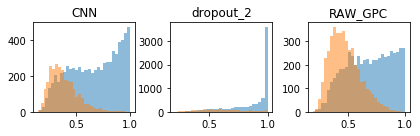

In [10]:
def max_prob(prob):
    return np.max(prob, axis=1)

def pred(prob):
    return np.argmax(prob, axis=1)

def correct(pred, y):
    return pred == y

cc_correct = correct(pred(cc["prob"]), cc["Yt"])
cc_max_prob = max_prob(cc["prob"])
cc_t_idxs = np.where(cc_correct)
cc_f_idxs = np.where(np.logical_not(cc_correct))

fig = plt.figure(figsize=(6,2))
plt.subplot(1, 3, 1)
plt.hist(cc_max_prob[cc_t_idxs], alpha=0.5, bins=30)
plt.hist(cc_max_prob[cc_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('CNN')

c128_correct = correct(pred(c128["prob"]), c128["Yt"])
c128_max_prob = max_prob(c128["prob"])
c128_max_prob_var = np.diag(c128["var"][:, np.argmax(c128["prob"], axis=1)])
c128_t_idxs = np.where(c128_correct)
c128_f_idxs = np.where(np.logical_not(c128_correct))

plt.subplot(1, 3, 2)
plt.hist(c128_max_prob[c128_t_idxs], alpha=0.5, bins=30)
plt.hist(c128_max_prob[c128_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('dropout_2')

cr_correct = correct(pred(cr["prob"]), cr["Yt"])
cr_max_prob = max_prob(cr["prob"])
cr_max_prob_var = np.diag(cr["var"][:, np.argmax(cr["prob"], axis=1)])
cr_t_idxs = np.where(cr_correct)
cr_f_idxs = np.where(np.logical_not(cr_correct))

plt.subplot(1, 3, 3)
plt.tight_layout(h_pad = 0.0, w_pad=0.0)
plt.hist(cr_max_prob[cr_t_idxs], alpha=0.5, bins=30)
plt.hist(cr_max_prob[cr_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('RAW_GPC')

fig.savefig(os.path.join('./plots/', 'probhist.pdf'), format="pdf", dpi=600)

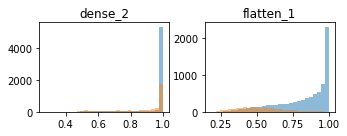

In [11]:
c10_correct = correct(pred(c10["prob"]), c10["Yt"])
c10_max_prob = max_prob(c10["prob"])
c10_max_prob_var = np.diag(c10["var"][:, np.argmax(c10["prob"], axis=1)])
c10_t_idxs = np.where(c10_correct)
c10_f_idxs = np.where(np.logical_not(c10_correct))

fig = plt.figure(figsize=(5,2))
plt.subplot(1, 2, 1)
plt.hist(c10_max_prob[c10_t_idxs], alpha=0.5, bins=30)
plt.hist(c10_max_prob[c10_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('dense_2')

c9216_correct = correct(pred(c9216["prob"]), c9216["Yt"])
c9216_max_prob = max_prob(c9216["prob"])
c9216_max_prob_var = np.diag(c9216["var"][:, np.argmax(c9216["prob"], axis=1)])
c9216_t_idxs = np.where(c9216_correct)
c9216_f_idxs = np.where(np.logical_not(c9216_correct))

plt.subplot(1, 2, 2)
plt.tight_layout(h_pad = 0.0, w_pad=1.0)
plt.hist(c9216_max_prob[c9216_t_idxs], alpha=0.5, bins=30)
plt.hist(c9216_max_prob[c9216_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('flatten_1')
fig.savefig(os.path.join('./plots/', 'probhist2.pdf'), format="pdf", dpi=600)

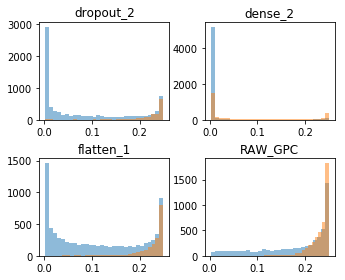

In [12]:
fig = plt.figure(figsize=(5,4))
plt.subplot(2, 2, 1)
plt.hist(c128_max_prob_var[c128_t_idxs], alpha=0.5, bins=30)
plt.hist(c128_max_prob_var[c128_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('dropout_2')
plt.subplot(2, 2, 2)
plt.hist(c10_max_prob_var[c10_t_idxs], alpha=0.5, bins=30)
plt.hist(c10_max_prob_var[c10_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('dense_2')
plt.subplot(2, 2, 3)
plt.hist(c9216_max_prob_var[c9216_t_idxs], alpha=0.5, bins=30)
plt.hist(c9216_max_prob_var[c9216_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('flatten_1')
plt.subplot(2, 2, 4)
plt.tight_layout(h_pad = 0.5, w_pad=0.0)
plt.hist(cr_max_prob_var[cr_t_idxs], alpha=0.5, bins=30)
plt.hist(cr_max_prob_var[cr_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('RAW_GPC')
fig.savefig(os.path.join('./plots/', 'varhist.pdf'), format="pdf", dpi=600)

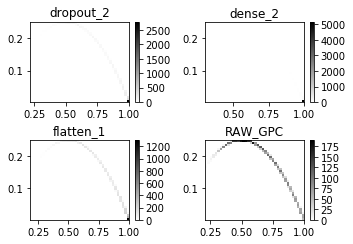

In [13]:

from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(5,3.5))
plt.subplot(2, 2, 1)
plt.hist2d(c128_max_prob[c128_t_idxs], c128_max_prob_var[c128_t_idxs], bins=40, cmap="binary")
plt.colorbar()
plt.gca().set_title('dropout_2')
plt.subplot(2, 2, 2)
plt.hist2d(c10_max_prob[c10_t_idxs], c10_max_prob_var[c10_t_idxs], bins=40, cmap="binary")
plt.colorbar()
plt.gca().set_title('dense_2')
plt.subplot(2, 2, 3)
plt.hist2d(c9216_max_prob[c9216_t_idxs], c9216_max_prob_var[c9216_t_idxs], bins=40, cmap="binary")
plt.colorbar()
plt.gca().set_title('flatten_1')
plt.subplot(2, 2, 4)
plt.tight_layout(h_pad = 0.5, w_pad=0.5)
plt.hist2d(cr_max_prob[cr_t_idxs], cr_max_prob_var[cr_t_idxs], bins=40, cmap="binary")
plt.colorbar()
plt.gca().set_title('RAW_GPC')
fig.savefig(os.path.join('./plots/', 'varhist.pdf'), format="pdf", dpi=600)

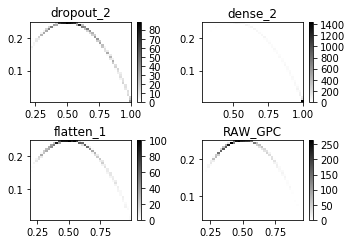

In [14]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(5,3.5))
plt.subplot(2, 2, 1)
plt.hist2d(c128_max_prob[c128_f_idxs], c128_max_prob_var[c128_f_idxs], bins=40, cmap="binary")
plt.colorbar()
plt.gca().set_title('dropout_2')
plt.subplot(2, 2, 2)
plt.hist2d(c10_max_prob[c10_f_idxs], c10_max_prob_var[c10_f_idxs], bins=40, cmap="binary")
plt.colorbar()
plt.gca().set_title('dense_2')
plt.subplot(2, 2, 3)
plt.hist2d(c9216_max_prob[c9216_f_idxs], c9216_max_prob_var[c9216_f_idxs], bins=40, cmap="binary")
plt.colorbar()
plt.gca().set_title('flatten_1')
plt.subplot(2, 2, 4)
plt.tight_layout(h_pad = 0.5, w_pad=0.5)
plt.hist2d(cr_max_prob[cr_f_idxs], cr_max_prob_var[cr_f_idxs], bins=40, cmap="binary")
plt.colorbar()
plt.gca().set_title('RAW_GPC')
fig.savefig(os.path.join('./plots/', 'varhist.pdf'), format="pdf", dpi=600)

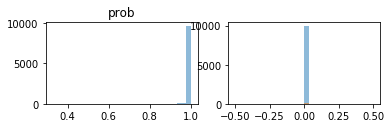

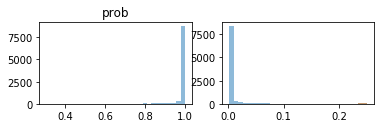

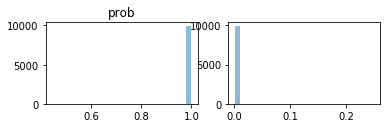

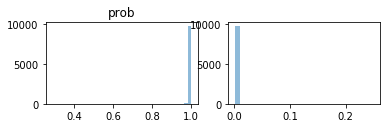

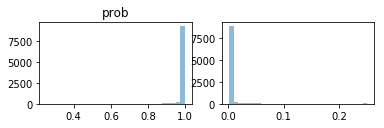

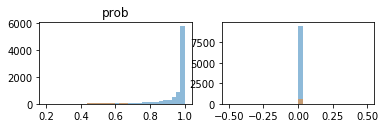

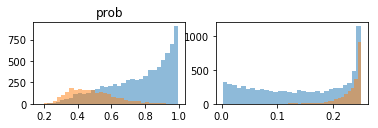

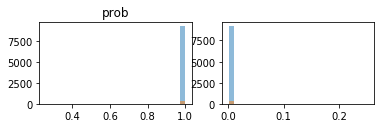

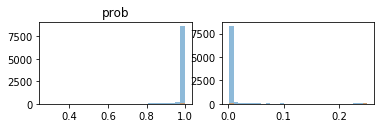

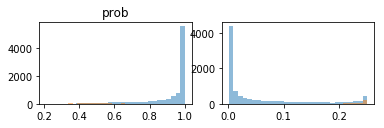

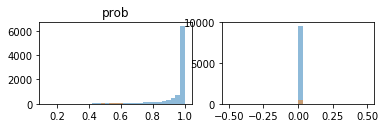

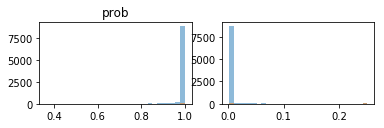

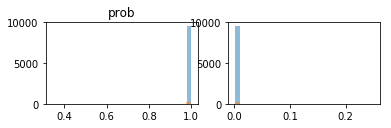

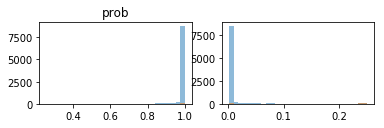

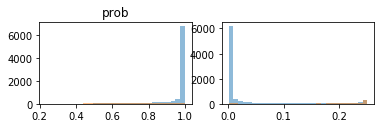

In [15]:
def prob_and_var(mydict):
    fig = plt.figure(figsize=(6,1.5))
    mydict_correct = correct(pred(mydict["prob"]), mydict["Yt"])
    mydict_max_prob = max_prob(mydict["prob"])
    mydict_max_prob_var = np.diag(mydict["var"][:, np.argmax(mydict["prob"], axis=1)])
    mydict_t_idxs = np.where(mydict_correct)
    mydict_f_idxs = np.where(np.logical_not(mydict_correct))

    plt.subplot(1, 2, 1)
    plt.hist(mydict_max_prob[mydict_t_idxs], alpha=0.5, bins=30)
    plt.hist(mydict_max_prob[mydict_f_idxs], alpha=0.5, bins=30)
    plt.gca().set_title('prob')
    
    plt.subplot(1, 2, 2)
    plt.hist(mydict_max_prob_var[mydict_t_idxs], alpha=0.5, bins=30)
    plt.hist(mydict_max_prob_var[mydict_f_idxs], alpha=0.5, bins=30)

dict_list = [mc, mr, m10, m128, m9216, ac, ar, a10, a128, a9216, bc, br, b10, b128, b9216]
for i in dict_list:
    prob_and_var(i)


## CNN-GPC pretty sure?

202
4
8
7
9
7


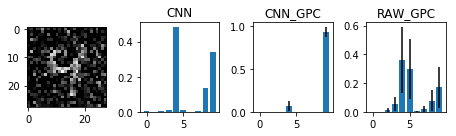

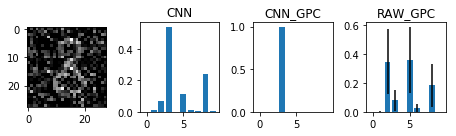

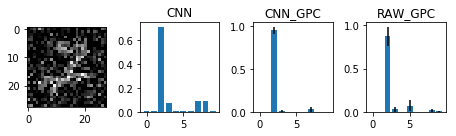

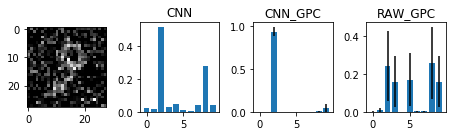

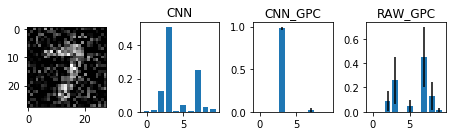

In [28]:
idxs = np.where(np.logical_and((np.max(c128["prob"], axis = 1) > 0.9) , (pred(c128["prob"]) != c128["Yt"])))[0]
print(len(idxs))
gen_img(idxs, 5, "sp")

In [17]:
#plt.bar(x=range(10), height=b128["prob"][idx], yerr=b128["var"][idx])

767
9
8
4
0
0


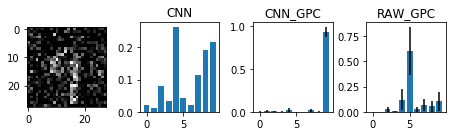

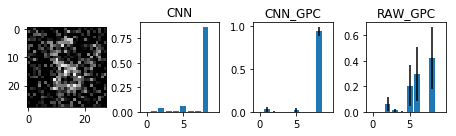

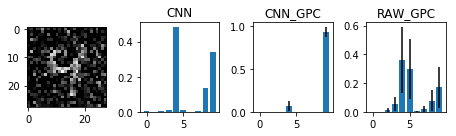

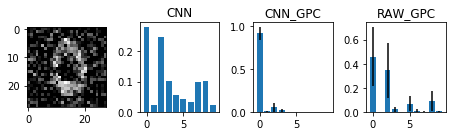

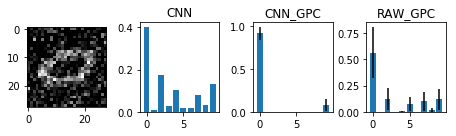

In [18]:
idxs = np.where(np.logical_and((np.max(c128["prob"], axis = 1) > 0.9) , ((np.max(c128["var"], axis = 1) > 0.05))))[0]
print(len(idxs))
gen_img(idxs, 5, "sp")

In [19]:
# Eval1 : prob - var as score, useless
def eval1(mydict):
    prob = mydict["prob"]
    var = mydict["var"]
    y = mydict["Yt"]
    pred = np.argmax((prob - 1*var), axis=1)
    return np.mean(pred == y)

# Eval2 : punitive metric, with ratio = 5
def eval2(mydict, thd=0.2):
    res = 0
    res_without = 0
    prob = mydict["prob"]
    var = mydict["var"]
    y = mydict["Yt"]
    pred = np.argmax(prob, axis=1)
    for i in range(len(y)):
        if pred[i] == y[i]:
            res_without += 1
            if var[i, pred[i]] <= thd:
                res += 1
        else:
            res_without -= 5
            if var[i, pred[i]] <= thd:
                res -= 5
    return (res, res_without)

# Eval3 : eval 2 with adjusted threshold.
def eval3(mydict):
    res_max = -10000000
    
    real_res_without = 0
    prob = mydict["prob"]
    var = mydict["var"]
    y = mydict["Yt"]
    pred = np.argmax(prob, axis=1)
    best_thd = -1
    
    # the thd should be decided by validation set if there exists.
    for thd in range(31):
        res = 0
        res_without = 0
        for i in range(len(y)):
            if pred[i] == y[i]:
                res_without += 1
                if var[i, pred[i]] <= thd/100:
                    res += 1
            else:
                res_without -= 3
                if var[i, pred[i]] <= thd/100:
                    res -= 3
        if res > res_max:
            res_max = res
            best_thd = thd
        real_res_without = res_without
    #return (res_max, res_without, best_thd)
    return '& ' + str(res_max) + '/' + str(res_without)


#print(eval1(cc), eval1(cr), eval1(c128), eval1(c10), eval1(c9216))
print(eval2(ac), eval2(ar), eval2(a128), eval2(a10), eval2(a9216))
print(eval2(bc), eval2(br), eval2(b128), eval2(b10), eval2(b9216))
print(eval2(cc), eval2(cr), eval2(c128), eval2(c10), eval2(c9216))
print()
print(eval3(mc), eval3(mr), eval3(m9216), eval3(m128), eval3(m10))
print(eval3(ac), eval3(ar), eval3(a9216), eval3(a128), eval3(a10))
print(eval3(bc), eval3(br), eval3(b9216), eval3(b128), eval3(b10))
print(eval3(cc), eval3(cr), eval3(c9216), eval3(c128), eval3(c10))

# need to train a threshold

(6664, 6664) (4127, -3866) (8047, 7312) (6932, 6676) (8134, 7150)
(7258, 7258) (8112, 7510) (7939, 6994) (8096, 7966) (5689, 3268)
(-6398, -6398) (818, -16046) (3448, -1514) (-8656, -12500) (4525, -1286)

& 9680/9680 & 9374/9112 & 9708/9624 & 9740/9676 & 9722/9708
& 7776/7776 & 4481/756 & 8373/8100 & 8620/8208 & 8194/7784
& 8172/8172 & 8698/8340 & 6878/5512 & 8607/7996 & 8858/8644
& -932/-932 & 1770/-7364 & 5119/2476 & 4721/2324 & 718/-5000


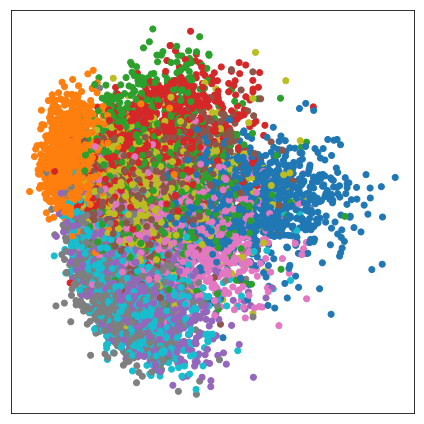

In [20]:
from itertools import product
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle

X_train, y_train = cr["feature"][:10000], cr["Yt"][:10000]  # lets subsample a bit for a first impression

pca = PCA(n_components=2)

fig, plot = plt.subplots()
fig.set_size_inches(6, 6)
plt.prism()

X_transformed = pca.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap="tab10")
plot.set_xticks(())
plot.set_yticks(())

plt.tight_layout()

(10000, 128)


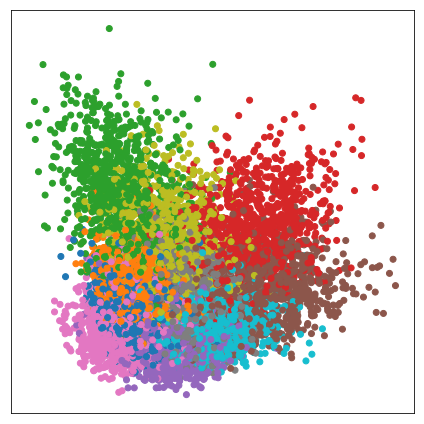

In [21]:
print(c128["feature"].shape)
X_train, y_train = c128["feature"][:10000], c128["Yt"][:10000]  # lets subsample a bit for a first impression

pca = PCA(n_components=2)

fig, plot = plt.subplots()
fig.set_size_inches(6, 6)
plt.prism()

X_transformed = pca.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap="tab10")
plot.set_xticks(())
plot.set_yticks(())

plt.tight_layout()

(10000, 128)


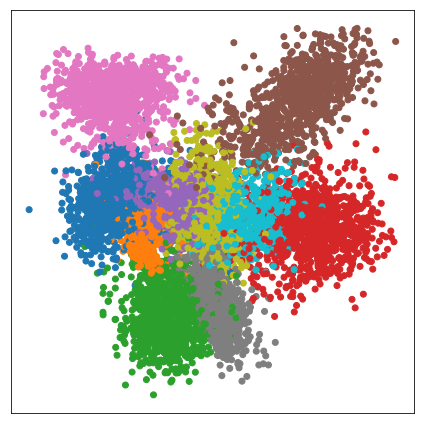

In [22]:
print(m128["feature"].shape)
X_train, y_train = m128["feature"][:10000], m128["Yt"][:10000]  # lets subsample a bit for a first impression

pca = PCA(n_components=2)

fig, plot = plt.subplots()
fig.set_size_inches(6, 6)
plt.prism()

X_transformed = pca.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap="tab10")
plot.set_xticks(())
plot.set_yticks(())

plt.tight_layout()

(10000, 784)


<IPython.core.display.Javascript object>


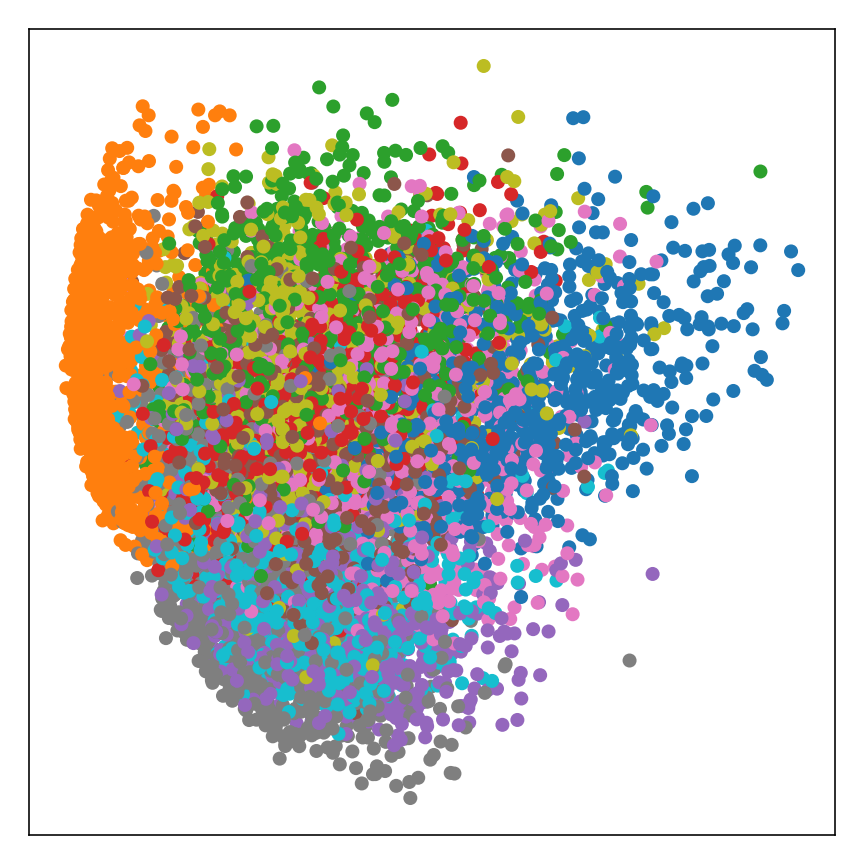

In [33]:
print(br["feature"].shape)
X_train, y_train = br["feature"][:10000], br["Yt"][:10000]  # lets subsample a bit for a first impression

pca = PCA(n_components=2)

fig, plot = plt.subplots()
fig.set_size_inches(6, 6)
plt.prism()

X_transformed = pca.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap="tab10")
plot.set_xticks(())
plot.set_yticks(())

plt.tight_layout()

<IPython.core.display.Javascript object>


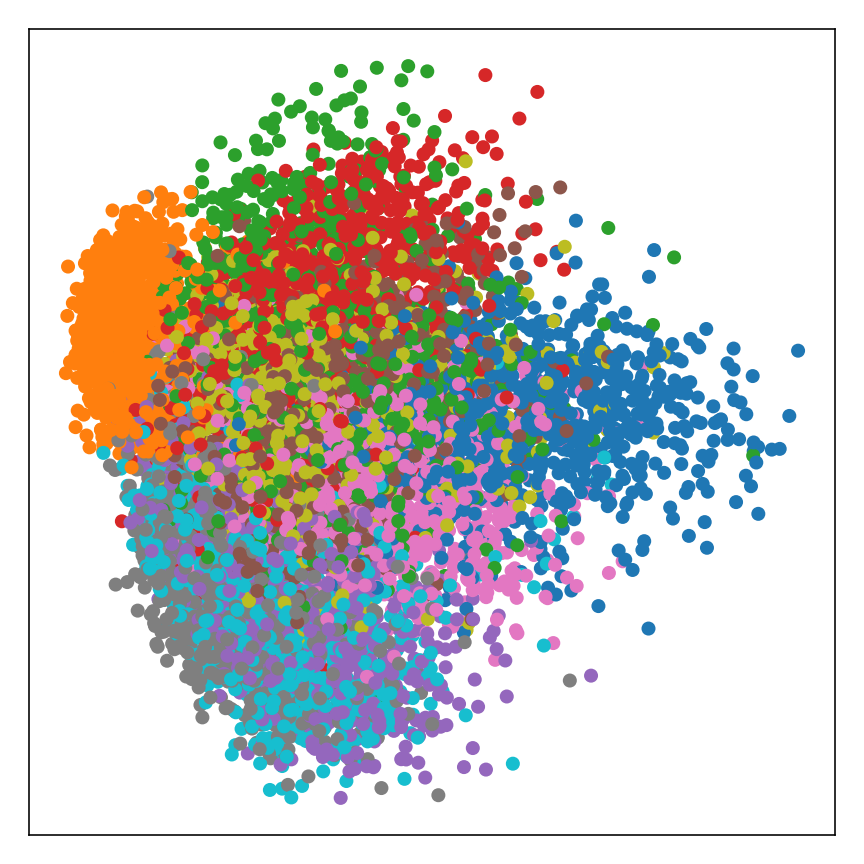

In [34]:
X_train, y_train = ar["feature"][:10000], ar["Yt"][:10000]  # lets subsample a bit for a first impression

pca = PCA(n_components=2)

fig, plot = plt.subplots()
fig.set_size_inches(6, 6)
plt.prism()

X_transformed = pca.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap="tab10")
plot.set_xticks(())
plot.set_yticks(())

plt.tight_layout()

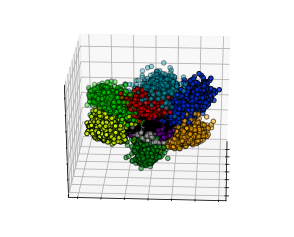

In [23]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
%matplotlib inline
from sklearn import datasets

np.random.seed(5)

X = m128["feature"]
y = m128["Yt"]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=27, azim=-177)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
fig.savefig(os.path.join('./plots/', 'm128.pdf'), format="pdf", dpi=600)

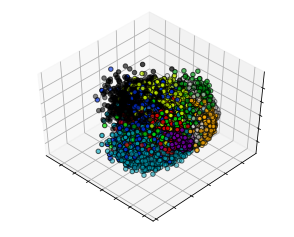

In [24]:
X = mr["feature"]
y = mr["Yt"]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
fig.savefig(os.path.join('./plots/', 'mr.pdf'), format="pdf", dpi=600)

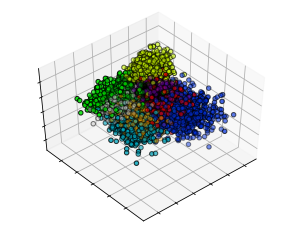

In [25]:
#%matplotlib notebook
%matplotlib inline
X = c128["feature"]
y = c128["Yt"]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=49)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
fig.savefig(os.path.join('./plots/', 'c128.pdf'), format="pdf", dpi=600)

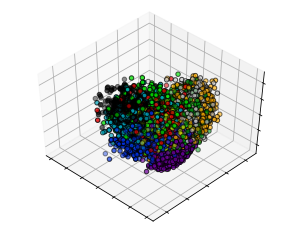

In [26]:
X = cr["feature"]
y = cr["Yt"]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
fig.savefig(os.path.join('./plots/', 'cr.pdf'), format="pdf", dpi=600)

<IPython.core.display.Javascript object>


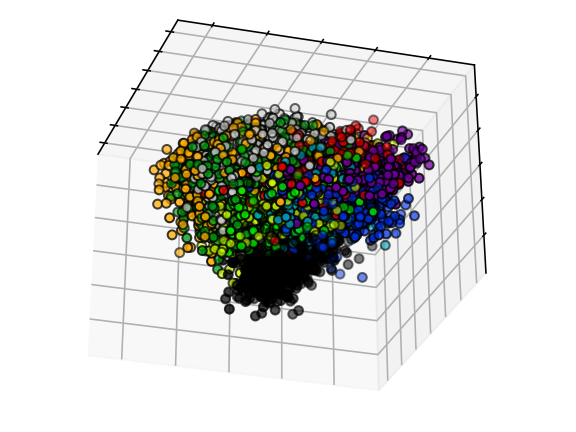

In [32]:
%matplotlib notebook
#%matplotlib inline
X = br["feature"]
y = br["Yt"]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=49)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
fig.savefig(os.path.join('./plots/', 'br.pdf'), format="pdf", dpi=600)